In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

img_real = Image.open('nirita_as_sample_small.jpg')
img_real = np.array(img_real)
img_origin = Image.open('indahkus_as_ideal_small.jpg')
img_origin = np.array(img_origin)
img_recon = np.zeros(img_real.shape)

In [17]:
[dim_1, dim_2, _] = img_recon.shape

for n in range(dim_1):
    for k in range(dim_2):
        diff = np.linalg.norm(img_origin - img_real[n,k,:], axis=2)
        idx = np.asarray(np.where(diff==np.nanmin(diff))).T
        img_recon[n,k] = img_origin[idx[0][0], idx[0][1]]

img_recon = img_recon.astype('uint8')

Text(0.5, 1.0, 'Real narrative')

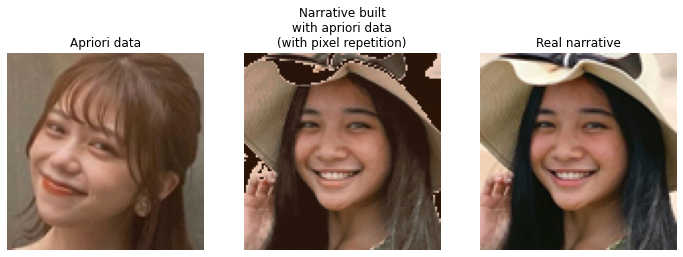

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), dpi=72, facecolor='white')

axes[0].imshow(img_origin)
axes[0].axis('off')
axes[0].set_title('Apriori data')

axes[1].imshow(img_recon)
axes[1].axis('off')
axes[1].set_title('Narrative built\nwith apriori data\n(with pixel repetition)')

axes[2].imshow(img_real)
axes[2].axis('off')
axes[2].set_title('Real narrative')

In [23]:
img_recon_2 = np.zeros(img_real.shape)

[dim_1, dim_2, _] = img_recon_2.shape

origin_copy = img_origin.astype('float')

possible_ind= range(0, dim_1*dim_2) # Note randint is inclusive of both ends
rand_ind = random.sample(possible_ind, dim_1*dim_2)

for row in range(dim_1):
    for column in range(dim_2):
        idx_recap_pos = np.ravel_multi_index([row, column], (dim_1, dim_2))    
        idx = rand_ind[idx_recap_pos] 
        n,k = np.unravel_index(idx, (dim_1,dim_2))
        diff = np.linalg.norm(origin_copy - img_real[n,k,:], axis=2)
        idx = np.asarray(np.where(diff==np.nanmin(diff))).T
        img_recon_2[n,k] = origin_copy[idx[0][0], idx[0][1]]
        origin_copy[idx[0][0], idx[0][1]] = np.nan
        
img_recon_2 = np.nan_to_num(img_recon_2).astype('uint8')

Text(0.05, 0.9, 'C1')

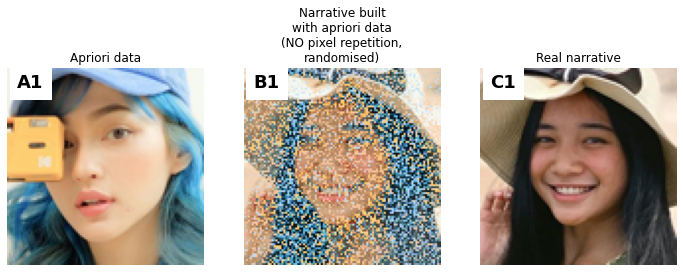

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), dpi=72, facecolor='white')

axes[0].imshow(img_origin)
axes[0].axis('off')
axes[0].set_title('Apriori data')
axes[0].text(0.05, 0.9, 'A1', transform=axes[0].transAxes,
             backgroundcolor='white', fontsize=18, weight='bold')

axes[1].imshow(img_recon_2)
axes[1].axis('off')
axes[1].set_title('Narrative built\nwith apriori data\n(NO pixel repetition,\nrandomised)')
axes[1].text(0.05, 0.9, 'B1', transform=axes[1].transAxes,
             backgroundcolor='white', fontsize=18, weight='bold')

axes[2].imshow(img_real)
axes[2].axis('off')
axes[2].set_title('Real narrative')
axes[2].text(0.05, 0.9, 'C1', transform=axes[2].transAxes,
             backgroundcolor='white', fontsize=18, weight='bold')

In [6]:
img_recon_3 = np.zeros(img_real.shape)

[dim_1, dim_2, _] = img_recon_3.shape

origin_copy = img_origin.astype('float')

for n in range(dim_1):
    for k in range(dim_2):
        diff = np.linalg.norm(origin_copy - img_real[n,k,:], axis=2)
        idx = np.asarray(np.where(diff==np.nanmin(diff))).T
        img_recon_3[n,k] = origin_copy[idx[0][0], idx[0][1]]
        origin_copy[idx[0][0], idx[0][1]] = np.nan
        
img_recon_3 = np.nan_to_num(img_recon_3).astype('uint8')

Text(0.5, 1.0, 'Real narrative')

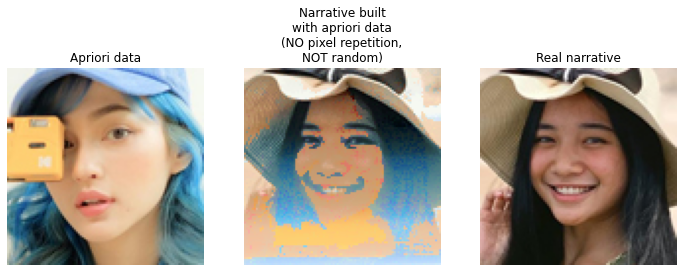

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), dpi=72, facecolor='white')

axes[0].imshow(img_origin)
axes[0].axis('off')
axes[0].set_title('Apriori data')

axes[1].imshow(img_recon_3)
axes[1].axis('off')
axes[1].set_title('Narrative built\nwith apriori data\n(NO pixel repetition,\nNOT random)')

axes[2].imshow(img_real)
axes[2].axis('off')
axes[2].set_title('Real narrative')

Text(0.5, 1.0, 'Real narrative')

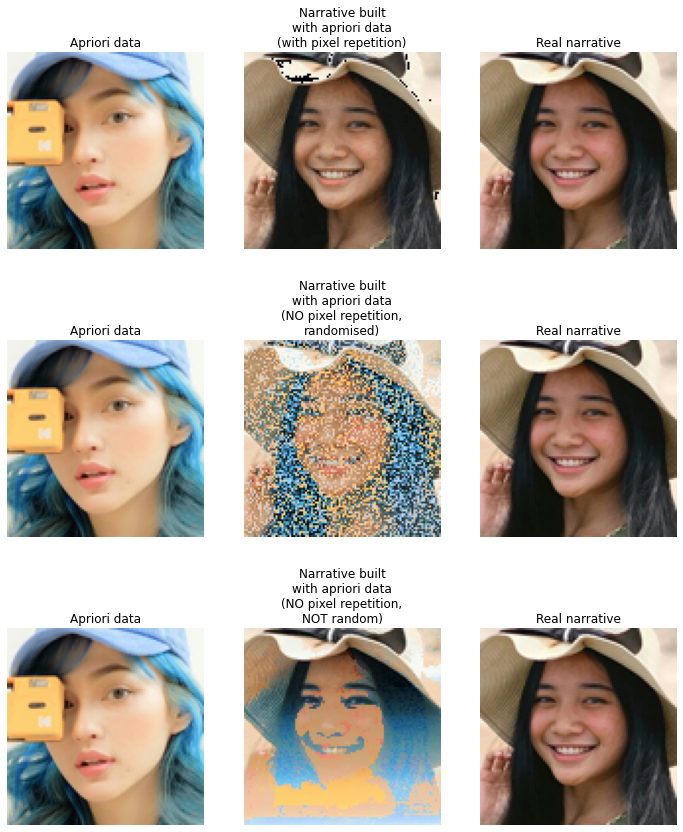

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(12, 15), dpi=72, facecolor='white')

axes[0, 0].imshow(img_origin)
axes[0, 0].axis('off')
axes[0, 0].set_title('Apriori data')

axes[0, 1].imshow(img_recon)
axes[0, 1].axis('off')
axes[0, 1].set_title('Narrative built\nwith apriori data\n(with pixel repetition)')

axes[0, 2].imshow(img_real)
axes[0, 2].axis('off')
axes[0, 2].set_title('Real narrative')

axes[1, 0].imshow(img_origin)
axes[1, 0].axis('off')
axes[1, 0].set_title('Apriori data')

axes[1, 1].imshow(img_recon_2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Narrative built\nwith apriori data\n(NO pixel repetition,\nrandomised)')

axes[1, 2].imshow(img_real)
axes[1, 2].axis('off')
axes[1, 2].set_title('Real narrative')

axes[2, 0].imshow(img_origin)
axes[2, 0].axis('off')
axes[2, 0].set_title('Apriori data')

axes[2, 1].imshow(img_recon_3)
axes[2, 1].axis('off')
axes[2, 1].set_title('Narrative built\nwith apriori data\n(NO pixel repetition,\nNOT random)')

axes[2, 2].imshow(img_real)
axes[2, 2].axis('off')
axes[2, 2].set_title('Real narrative')